#Solubility Prediction

**[Part 1] Download Bioactivity Data (Concised version)**

In **Part 1**, we will be performing Data Collection and Pre-Processing from the ChEMBL Database.


## **Installing libraries**

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [5]:
! pip install chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jsonschema 4.19.0 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
referencing 0.30.2 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.


In [6]:
!pip install pandas

## **Importing libraries**

In [7]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Search for Target protein**

### **Target search for Phosphodiesterase**

In [8]:
# target search for alzheimer's disease
target = new_client.target
target_query = target.search('phosphodiesterase')
targets = pd.DataFrame.from_dict(target_query)
targets

cross_references  \
0    [{'xref_id': 'Q9XSW7', 'xref_name': None, 'xre...   
1    [{'xref_id': 'Q8VBU5', 'xref_name': None, 'xre...   
2    [{'xref_id': 'E1BN64', 'xref_name': None, 'xre...   
3    [{'xref_id': 'Q9NUW8', 'xref_name': None, 'xre...   
4                                                   []   
..                                                 ...   
116                                                 []   
117                                                 []   
118                                                 []   
119                                                 []   
120                                                 []   

                          organism  \
0                       Sus scrofa   
1                     Mus musculus   
2                       Bos taurus   
3                     Homo sapiens   
4                Trypanosoma cruzi   
..                             ...   
116              Rattus norvegicus   
117                   Mus musculus   
118                   Mus musculus   
119  Escherichia coli (strain K12)   
120                   Homo sapiens   

                                             pref_name  score  \
0                                 Phosphodiesterase 3A   12.0   
1                                 Phosphodiesterase 4B   12.0   
2                                 Phosphodiesterase 3B   12.0   
3                      Tyrosyl-DNA phosphodiesterase 1   12.0   
4         Cyclic nucleotide specific phosphodiesterase   12.0   
..                                                 ...    ...   
116  1-phosphatidylinositol 4,5-bisphosphate phosph...    7.0   
117  1-phosphatidylinositol 4,5-bisphosphate phosph...    7.0   
118  1-phosphatidylinositol 4,5-bisphosphate phosph...    7.0   
119                        Multifunctional CCA protein    6.0   
120                                         PDE6D/KRAS    6.0   

     species_group_flag target_chembl_id  \
0                 False       CHEMBL3061   
1                 False       CHEMBL2272   
2                 False       CHEMBL5129   
3                 False    CHEMBL1075138   
4                 False    CHEMBL1681621   
..                  ...              ...   
116               False    CHEMBL1914273   
117               False    CHEMBL3608199   
118               False    CHEMBL4879495   
119               False    CHEMBL3309020   
120               False    CHEMBL4523623   

                                     target_components  \
0    [{'accession': 'Q9XSW7', 'component_descriptio...   
1    [{'accession': 'Q8VBU5', 'component_descriptio...   
2    [{'accession': 'E1BN64', 'component_descriptio...   
3    [{'accession': 'Q9NUW8', 'component_descriptio...   
4    [{'accession': 'Q53I59', 'component_descriptio...   
..                                                 ...   
116  [{'accession': 'P10688', 'component_descriptio...   
117  [{'accession': 'Q8CIH5', 'component_descriptio...   
118  [{'accession': 'Q8K2J0', 'component_descriptio...   
119  [{'accession': 'P06961', 'component_descriptio...   
120  [{'accession': 'O43924', 'component_descriptio...   

                     target_type  tax_id  
0                 SINGLE PROTEIN    9823  
1                 SINGLE PROTEIN   10090  
2                 SINGLE PROTEIN    9913  
3                 SINGLE PROTEIN    9606  
4                 SINGLE PROTEIN    5693  
..                           ...     ...  
116               SINGLE PROTEIN   10116  
117               SINGLE PROTEIN   10090  
118               SINGLE PROTEIN   10090  
119               SINGLE PROTEIN   83333  
120  PROTEIN-PROTEIN INTERACTION    9606  

[121 rows x 9 columns]

### **Select and retrieve bioactivity data for *Human Phosphodiesterase* (first entry)**

We will assign the fifteenth entry (which corresponds to the target protein, *Human Phosphodiesterase*) to the ***selected_target*** variable

In [9]:
selected_target = targets.target_chembl_id[15]
selected_target

'CHEMBL1827'

Here, we will retrieve only bioactivity data for *Phosphodiesterase* (CHEMBL1827) that are reported as pChEMBL values.

In [10]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [11]:
df = pd.DataFrame.from_dict(res)

In [12]:
df

action_type activity_comment  \
0                                                  None             None   
1                                                  None             None   
2                                                  None             None   
3                                                  None             None   
4                                                  None             None   
...                                                 ...              ...   
3302  {'action_type': 'INHIBITOR', 'description': 'N...             None   
3303  {'action_type': 'INHIBITOR', 'description': 'N...             None   
3304  {'action_type': 'INHIBITOR', 'description': 'N...             None   
3305  {'action_type': 'INHIBITOR', 'description': 'N...             None   
3306  {'action_type': 'INHIBITOR', 'description': 'N...             None   

      activity_id                                activity_properties  \
0           73365                                                 []   
1           75566                                                 []   
2           76703                                                 []   
3           76706                                                 []   
4           77799                                                 []   
...           ...                                                ...   
3302     24873478  [{'comments': None, 'relation': '=', 'result_f...   
3303     24896946  [{'comments': None, 'relation': '=', 'result_f...   
3304     24929421  [{'comments': None, 'relation': '=', 'result_f...   
3305     24958749  [{'comments': None, 'relation': '=', 'result_f...   
3306     24958750  [{'comments': None, 'relation': '=', 'result_f...   

     assay_chembl_id                                  assay_description  \
0       CHEMBL762829  Inhibitory activity against human platelet Pho...   
1       CHEMBL762829  Inhibitory activity against human platelet Pho...   
2       CHEMBL762829  Inhibitory activity against human platelet Pho...   
3       CHEMBL762829  Inhibitory activity against human platelet Pho...   
4       CHEMBL762829  Inhibitory activity against human platelet Pho...   
...              ...                                                ...   
3302   CHEMBL5153773  Inhibition of human PDE5 using [3H]cGMP as sub...   
3303   CHEMBL5159506  Inhibition of PDE5A1 (535 to 860 residues) (un...   
3304   CHEMBL5168616  Inhibition of PDE5A1 (535 to 860 residues) (un...   
3305   CHEMBL5215082  Inhibition of PDE5 (unknown origin) incubated ...   
3306   CHEMBL5215082  Inhibition of PDE5 (unknown origin) incubated ...   

     assay_type assay_variant_accession assay_variant_mutation bao_endpoint  \
0             B                    None                   None  BAO_0000190   
1             B                    None                   None  BAO_0000190   
2             B                    None                   None  BAO_0000190   
3             B                    None                   None  BAO_0000190   
4             B                    None                   None  BAO_0000190   
...         ...                     ...                    ...          ...   
3302          B                    None                   None  BAO_0000190   
3303          B                    None                   None  BAO_0000190   
3304          B                    None                   None  BAO_0000190   
3305          B                    None                   None  BAO_0000190   
3306          B                    None                   None  BAO_0000190   

      ... target_organism      target_pref_name target_tax_id text_value  \
0     ...    Homo sapiens  Phosphodiesterase 5A          9606       None   
1     ...    Homo sapiens  Phosphodiesterase 5A          9606       None   
2     ...    Homo sapiens  Phosphodiesterase 5A          9606       None   
3     ...    Homo sapiens  Phosphodiesterase 5A          9606       None   
4     ...    Homo sapiens  Phosphodi

Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

In [13]:
df.to_csv('phosphodiesterase_01_bioactivity_data_raw.csv', index=False)

## **Handling missing data**
If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it.

In [15]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-15-955aac5800f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


action_type activity_comment  \
0                                                  None             None   
1                                                  None             None   
2                                                  None             None   
3                                                  None             None   
4                                                  None             None   
...                                                 ...              ...   
3302  {'action_type': 'INHIBITOR', 'description': 'N...             None   
3303  {'action_type': 'INHIBITOR', 'description': 'N...             None   
3304  {'action_type': 'INHIBITOR', 'description': 'N...             None   
3305  {'action_type': 'INHIBITOR', 'description': 'N...             None   
3306  {'action_type': 'INHIBITOR', 'description': 'N...             None   

      activity_id                                activity_properties  \
0           73365                                                 []   
1           75566                                                 []   
2           76703                                                 []   
3           76706                                                 []   
4           77799                                                 []   
...           ...                                                ...   
3302     24873478  [{'comments': None, 'relation': '=', 'result_f...   
3303     24896946  [{'comments': None, 'relation': '=', 'result_f...   
3304     24929421  [{'comments': None, 'relation': '=', 'result_f...   
3305     24958749  [{'comments': None, 'relation': '=', 'result_f...   
3306     24958750  [{'comments': None, 'relation': '=', 'result_f...   

     assay_chembl_id                                  assay_description  \
0       CHEMBL762829  Inhibitory activity against human platelet Pho...   
1       CHEMBL762829  Inhibitory activity against human platelet Pho...   
2       CHEMBL762829  Inhibitory activity against human platelet Pho...   
3       CHEMBL762829  Inhibitory activity against human platelet Pho...   
4       CHEMBL762829  Inhibitory activity against human platelet Pho...   
...              ...                                                ...   
3302   CHEMBL5153773  Inhibition of human PDE5 using [3H]cGMP as sub...   
3303   CHEMBL5159506  Inhibition of PDE5A1 (535 to 860 residues) (un...   
3304   CHEMBL5168616  Inhibition of PDE5A1 (535 to 860 residues) (un...   
3305   CHEMBL5215082  Inhibition of PDE5 (unknown origin) incubated ...   
3306   CHEMBL5215082  Inhibition of PDE5 (unknown origin) incubated ...   

     assay_type assay_variant_accession assay_variant_mutation bao_endpoint  \
0             B                    None                   None  BAO_0000190   
1             B                    None                   None  BAO_0000190   
2             B                    None                   None  BAO_0000190   
3             B                    None                   None  BAO_0000190   
4             B                    None                   None  BAO_0000190   
...         ...                     ...                    ...          ...   
3302          B                    None                   None  BAO_0000190   
3303          B                    None                   None  BAO_0000190   
3304          B                    None                   None  BAO_0000190   
3305          B                    None                   None  BAO_0000190   
3306          B                    None                   None  BAO_0000190   

      ... target_organism      target_pref_name target_tax_id text_value  \
0     ...    Homo sapiens  Phosphodiesterase 5A          9606       None   
1     ...    Homo sapiens  Phosphodiesterase 5A          9606       None   
2     ...    Homo sapiens  Phosphodiesterase 5A          9606       None   
3     ...    Homo sapiens  Phosphodiesterase 5A          9606       None   
4     ...    Homo sapiens  Phosphodi

In [16]:
len(df2.canonical_smiles.unique())

2064

In [17]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

action_type activity_comment  \
0                                                  None             None   
1                                                  None             None   
2                                                  None             None   
3                                                  None             None   
4                                                  None             None   
...                                                 ...              ...   
3302  {'action_type': 'INHIBITOR', 'description': 'N...             None   
3303  {'action_type': 'INHIBITOR', 'description': 'N...             None   
3304  {'action_type': 'INHIBITOR', 'description': 'N...             None   
3305  {'action_type': 'INHIBITOR', 'description': 'N...             None   
3306  {'action_type': 'INHIBITOR', 'description': 'N...             None   

      activity_id                                activity_properties  \
0           73365                                                 []   
1           75566                                                 []   
2           76703                                                 []   
3           76706                                                 []   
4           77799                                                 []   
...           ...                                                ...   
3302     24873478  [{'comments': None, 'relation': '=', 'result_f...   
3303     24896946  [{'comments': None, 'relation': '=', 'result_f...   
3304     24929421  [{'comments': None, 'relation': '=', 'result_f...   
3305     24958749  [{'comments': None, 'relation': '=', 'result_f...   
3306     24958750  [{'comments': None, 'relation': '=', 'result_f...   

     assay_chembl_id                                  assay_description  \
0       CHEMBL762829  Inhibitory activity against human platelet Pho...   
1       CHEMBL762829  Inhibitory activity against human platelet Pho...   
2       CHEMBL762829  Inhibitory activity against human platelet Pho...   
3       CHEMBL762829  Inhibitory activity against human platelet Pho...   
4       CHEMBL762829  Inhibitory activity against human platelet Pho...   
...              ...                                                ...   
3302   CHEMBL5153773  Inhibition of human PDE5 using [3H]cGMP as sub...   
3303   CHEMBL5159506  Inhibition of PDE5A1 (535 to 860 residues) (un...   
3304   CHEMBL5168616  Inhibition of PDE5A1 (535 to 860 residues) (un...   
3305   CHEMBL5215082  Inhibition of PDE5 (unknown origin) incubated ...   
3306   CHEMBL5215082  Inhibition of PDE5 (unknown origin) incubated ...   

     assay_type assay_variant_accession assay_variant_mutation bao_endpoint  \
0             B                    None                   None  BAO_0000190   
1             B                    None                   None  BAO_0000190   
2             B                    None                   None  BAO_0000190   
3             B                    None                   None  BAO_0000190   
4             B                    None                   None  BAO_0000190   
...         ...                     ...                    ...          ...   
3302          B                    None                   None  BAO_0000190   
3303          B                    None                   None  BAO_0000190   
3304          B                    None                   None  BAO_0000190   
3305          B                    None                   None  BAO_0000190   
3306          B                    None                   None  BAO_0000190   

      ... target_organism      target_pref_name target_tax_id text_value  \
0     ...    Homo sapiens  Phosphodiesterase 5A          9606       None   
1     ...    Homo sapiens  Phosphodiesterase 5A          9606       None   
2     ...    Homo sapiens  Phosphodiesterase 5A          9606       None   
3     ...    Homo sapiens  Phosphodiesterase 5A          9606       None   
4     ...    Homo sapiens  Phosphodi

## **Data pre-processing of the bioactivity data**

### **Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a dataFrame**

In [18]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL316185  CCOc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=O)[n...   
1           CHEMBL90164  CCCOc1ccc(S(=O)(=O)N(CC)CCN(C)C)cc1-c1nc2c(=O)...   
2           CHEMBL87901   CCCOc1ccccc1-c1nc2c(=O)n(C)c(=O)n(CC(C)C)c2[nH]1   
3          CHEMBL313197  CCCOc1ccc(S(=O)(=O)N2CCN(CCN(C)C)CC2)cc1-c1nc2...   
4           CHEMBL86578  CC(C)COc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=...   
...                 ...                                                ...   
3302      CHEMBL5195434  COc1cc2nc(Nc3cccc(S(N)(=O)=O)c3)nc(NC3CCN(C(C)...   
3303      CHEMBL5171560  CCn1c(=O)c2c(c3ccc(C)nc31)O[C@@](C)(CCO)C[C@H]...   
3304      CHEMBL5180169  CC1=C(C(=O)O[C@H](C)c2ccccc2)C(c2ccc3c(cnn3C)c...   
3305      CHEMBL5219000  O=C(CCCCCCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2...   
3306      CHEMBL5220907  O=C(O)CCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2c2...   

     standard_value  
0           10000.0  
1              11.0  
2              60.0  
3              24.0  
4              93.0  
...             ...  
3302         3410.0  
3303         4250.0  
3304         1810.0  
3305           46.2  
3306            2.0  

[2064 rows x 3 columns]

In [19]:
df3.to_csv('phosphodiesterase_02_bioactivity_data_preprocessed.csv', index=False)

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [20]:
df4 = pd.read_csv('phosphodiesterase_02_bioactivity_data_preprocessed.csv')

In [21]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [22]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL316185  CCOc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=O)[n...   
1           CHEMBL90164  CCCOc1ccc(S(=O)(=O)N(CC)CCN(C)C)cc1-c1nc2c(=O)...   
2           CHEMBL87901   CCCOc1ccccc1-c1nc2c(=O)n(C)c(=O)n(CC(C)C)c2[nH]1   
3          CHEMBL313197  CCCOc1ccc(S(=O)(=O)N2CCN(CCN(C)C)CC2)cc1-c1nc2...   
4           CHEMBL86578  CC(C)COc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=...   
...                 ...                                                ...   
2059      CHEMBL5195434  COc1cc2nc(Nc3cccc(S(N)(=O)=O)c3)nc(NC3CCN(C(C)...   
2060      CHEMBL5171560  CCn1c(=O)c2c(c3ccc(C)nc31)O[C@@](C)(CCO)C[C@H]...   
2061      CHEMBL5180169  CC1=C(C(=O)O[C@H](C)c2ccccc2)C(c2ccc3c(cnn3C)c...   
2062      CHEMBL5219000  O=C(CCCCCCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2...   
2063      CHEMBL5220907  O=C(O)CCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2c2...   

      standard_value         class  
0            10000.0      inactive  
1               11.0        active  
2               60.0        active  
3               24.0        active  
4               93.0        active  
...              ...           ...  
2059          3410.0  intermediate  
2060          4250.0  intermediate  
2061          1810.0  intermediate  
2062            46.2        active  
2063             2.0        active  

[2064 rows x 4 columns]

In [23]:
df5.to_csv('phosphodiesterase_03_bioactivity_data_curated.csv', index=False)

In [24]:
! zip phosphodiesterase.zip *.csv

  adding: phosphodiesterase_01_bioactivity_data_raw.csv (deflated 91%)
  adding: phosphodiesterase_02_bioactivity_data_preprocessed.csv (deflated 81%)
  adding: phosphodiesterase_03_bioactivity_data_curated.csv (deflated 82%)


# **[Part 2] Exploratory Data Analysis**

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.


## **Install conda and rdkit**

In [25]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-09-04 14:05:57--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   196MB/s    in 0.4s    

2023-09-04 14:05:58 (196 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

## **Load bioactivity data**

In [31]:
df = pd.read_csv('/content/phosphodiesterase_03_bioactivity_data_curated.csv')
df

molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL316185  CCOc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=O)[n...   
1           CHEMBL90164  CCCOc1ccc(S(=O)(=O)N(CC)CCN(C)C)cc1-c1nc2c(=O)...   
2           CHEMBL87901   CCCOc1ccccc1-c1nc2c(=O)n(C)c(=O)n(CC(C)C)c2[nH]1   
3          CHEMBL313197  CCCOc1ccc(S(=O)(=O)N2CCN(CCN(C)C)CC2)cc1-c1nc2...   
4           CHEMBL86578  CC(C)COc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=...   
...                 ...                                                ...   
2059      CHEMBL5195434  COc1cc2nc(Nc3cccc(S(N)(=O)=O)c3)nc(NC3CCN(C(C)...   
2060      CHEMBL5171560  CCn1c(=O)c2c(c3ccc(C)nc31)O[C@@](C)(CCO)C[C@H]...   
2061      CHEMBL5180169  CC1=C(C(=O)O[C@H](C)c2ccccc2)C(c2ccc3c(cnn3C)c...   
2062      CHEMBL5219000  O=C(CCCCCCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2...   
2063      CHEMBL5220907  O=C(O)CCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2c2...   

      standard_value         class  
0            10000.0      inactive  
1               11.0        active  
2               60.0        active  
3               24.0        active  
4               93.0        active  
...              ...           ...  
2059          3410.0  intermediate  
2060          4250.0  intermediate  
2061          1810.0  intermediate  
2062            46.2        active  
2063             2.0        active  

[2064 rows x 4 columns]

In [32]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [33]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [34]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

molecule_chembl_id  standard_value         class  \
0          CHEMBL316185         10000.0      inactive   
1           CHEMBL90164            11.0        active   
2           CHEMBL87901            60.0        active   
3          CHEMBL313197            24.0        active   
4           CHEMBL86578            93.0        active   
...                 ...             ...           ...   
2059      CHEMBL5195434          3410.0  intermediate   
2060      CHEMBL5171560          4250.0  intermediate   
2061      CHEMBL5180169          1810.0  intermediate   
2062      CHEMBL5219000            46.2        active   
2063      CHEMBL5220907             2.0        active   

                                       canonical_smiles  
0     CCOc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=O)[n...  
1     CCCOc1ccc(S(=O)(=O)N(CC)CCN(C)C)cc1-c1nc2c(=O)...  
2      CCCOc1ccccc1-c1nc2c(=O)n(C)c(=O)n(CC(C)C)c2[nH]1  
3     CCCOc1ccc(S(=O)(=O)N2CCN(CCN(C)C)CC2)cc1-c1nc2...  
4     CC(C)COc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=...  
...                                                 ...  
2059  COc1cc2nc(Nc3cccc(S(N)(=O)=O)c3)nc(NC3CCN(C(C)...  
2060  CCn1c(=O)c2c(c3ccc(C)nc31)O[C@@](C)(CCO)C[C@H]...  
2061  CC1=C(C(=O)O[C@H](C)c2ccccc2)C(c2ccc3c(cnn3C)c...  
2062  O=C(CCCCCCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2...  
2063  O=C(O)CCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2c2...  

[2064 rows x 4 columns]

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [35]:
!pip install rdkit

In [36]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [37]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [38]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

MW     LogP  NumHDonors  NumHAcceptors
0     448.505 -0.04830         2.0            8.0
1     534.683  2.10730         1.0            9.0
2     356.426  2.53510         1.0            6.0
3     575.736  1.40300         1.0           10.0
4     532.667  1.71720         1.0            9.0
...       ...      ...         ...            ...
2059  500.625  3.32270         3.0            9.0
2060  356.466  3.69822         1.0            5.0
2061  535.644  6.41690         1.0            7.0
2062  555.473  3.96710         3.0            5.0
2063  484.350  2.98590         2.0            4.0

[2064 rows x 4 columns]

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [39]:
df_lipinski

MW     LogP  NumHDonors  NumHAcceptors
0     448.505 -0.04830         2.0            8.0
1     534.683  2.10730         1.0            9.0
2     356.426  2.53510         1.0            6.0
3     575.736  1.40300         1.0           10.0
4     532.667  1.71720         1.0            9.0
...       ...      ...         ...            ...
2059  500.625  3.32270         3.0            9.0
2060  356.466  3.69822         1.0            5.0
2061  535.644  6.41690         1.0            7.0
2062  555.473  3.96710         3.0            5.0
2063  484.350  2.98590         2.0            4.0

[2064 rows x 4 columns]

In [40]:
df

molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL316185  CCOc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=O)[n...   
1           CHEMBL90164  CCCOc1ccc(S(=O)(=O)N(CC)CCN(C)C)cc1-c1nc2c(=O)...   
2           CHEMBL87901   CCCOc1ccccc1-c1nc2c(=O)n(C)c(=O)n(CC(C)C)c2[nH]1   
3          CHEMBL313197  CCCOc1ccc(S(=O)(=O)N2CCN(CCN(C)C)CC2)cc1-c1nc2...   
4           CHEMBL86578  CC(C)COc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=...   
...                 ...                                                ...   
2059      CHEMBL5195434  COc1cc2nc(Nc3cccc(S(N)(=O)=O)c3)nc(NC3CCN(C(C)...   
2060      CHEMBL5171560  CCn1c(=O)c2c(c3ccc(C)nc31)O[C@@](C)(CCO)C[C@H]...   
2061      CHEMBL5180169  CC1=C(C(=O)O[C@H](C)c2ccccc2)C(c2ccc3c(cnn3C)c...   
2062      CHEMBL5219000  O=C(CCCCCCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2...   
2063      CHEMBL5220907  O=C(O)CCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2c2...   

      standard_value         class  
0            10000.0      inactive  
1               11.0        active  
2               60.0        active  
3               24.0        active  
4               93.0        active  
...              ...           ...  
2059          3410.0  intermediate  
2060          4250.0  intermediate  
2061          1810.0  intermediate  
2062            46.2        active  
2063             2.0        active  

[2064 rows x 4 columns]

Now, let's combine the 2 DataFrame

In [41]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [42]:
df_combined

molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL316185  CCOc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=O)[n...   
1           CHEMBL90164  CCCOc1ccc(S(=O)(=O)N(CC)CCN(C)C)cc1-c1nc2c(=O)...   
2           CHEMBL87901   CCCOc1ccccc1-c1nc2c(=O)n(C)c(=O)n(CC(C)C)c2[nH]1   
3          CHEMBL313197  CCCOc1ccc(S(=O)(=O)N2CCN(CCN(C)C)CC2)cc1-c1nc2...   
4           CHEMBL86578  CC(C)COc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=...   
...                 ...                                                ...   
2059      CHEMBL5195434  COc1cc2nc(Nc3cccc(S(N)(=O)=O)c3)nc(NC3CCN(C(C)...   
2060      CHEMBL5171560  CCn1c(=O)c2c(c3ccc(C)nc31)O[C@@](C)(CCO)C[C@H]...   
2061      CHEMBL5180169  CC1=C(C(=O)O[C@H](C)c2ccccc2)C(c2ccc3c(cnn3C)c...   
2062      CHEMBL5219000  O=C(CCCCCCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2...   
2063      CHEMBL5220907  O=C(O)CCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2c2...   

      standard_value         class       MW     LogP  NumHDonors  \
0            10000.0      inactive  448.505 -0.04830         2.0   
1               11.0        active  534.683  2.10730         1.0   
2               60.0        active  356.426  2.53510         1.0   
3               24.0        active  575.736  1.40300         1.0   
4               93.0        active  532.667  1.71720         1.0   
...              ...           ...      ...      ...         ...   
2059          3410.0  intermediate  500.625  3.32270         3.0   
2060          4250.0  intermediate  356.466  3.69822         1.0   
2061          1810.0  intermediate  535.644  6.41690         1.0   
2062            46.2        active  555.473  3.96710         3.0   
2063             2.0        active  484.350  2.98590         2.0   

      NumHAcceptors  
0               8.0  
1               9.0  
2               6.0  
3              10.0  
4               9.0  
...             ...  
2059            9.0  
2060            5.0  
2061            7.0  
2062            5.0  
2063            4.0  

[2064 rows x 8 columns]

### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [43]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [44]:
df_combined.standard_value.describe()

count    2.064000e+03
mean     3.367943e+10
std      5.597686e+11
min      7.000000e-03
25%      5.000000e+00
50%      1.215000e+02
75%      4.000000e+03
max      1.995262e+13
Name: standard_value, dtype: float64

In [45]:
-np.log10( (10**-9)* 100000000 )

1.0

In [46]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [47]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [48]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-47-c8e03533cbc3>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL316185  CCOc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=O)[n...   
1           CHEMBL90164  CCCOc1ccc(S(=O)(=O)N(CC)CCN(C)C)cc1-c1nc2c(=O)...   
2           CHEMBL87901   CCCOc1ccccc1-c1nc2c(=O)n(C)c(=O)n(CC(C)C)c2[nH]1   
3          CHEMBL313197  CCCOc1ccc(S(=O)(=O)N2CCN(CCN(C)C)CC2)cc1-c1nc2...   
4           CHEMBL86578  CC(C)COc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=...   
...                 ...                                                ...   
2059      CHEMBL5195434  COc1cc2nc(Nc3cccc(S(N)(=O)=O)c3)nc(NC3CCN(C(C)...   
2060      CHEMBL5171560  CCn1c(=O)c2c(c3ccc(C)nc31)O[C@@](C)(CCO)C[C@H]...   
2061      CHEMBL5180169  CC1=C(C(=O)O[C@H](C)c2ccccc2)C(c2ccc3c(cnn3C)c...   
2062      CHEMBL5219000  O=C(CCCCCCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2...   
2063      CHEMBL5220907  O=C(O)CCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2c2...   

             class       MW     LogP  NumHDonors  NumHAcceptors  \
0         inactive  448.505 -0.04830         2.0            8.0   
1           active  534.683  2.10730         1.0            9.0   
2           active  356.426  2.53510         1.0            6.0   
3           active  575.736  1.40300         1.0           10.0   
4           active  532.667  1.71720         1.0            9.0   
...            ...      ...      ...         ...            ...   
2059  intermediate  500.625  3.32270         3.0            9.0   
2060  intermediate  356.466  3.69822         1.0            5.0   
2061  intermediate  535.644  6.41690         1.0            7.0   
2062        active  555.473  3.96710         3.0            5.0   
2063        active  484.350  2.98590         2.0            4.0   

      standard_value_norm  
0                 10000.0  
1                    11.0  
2                    60.0  
3                    24.0  
4                    93.0  
...                   ...  
2059               3410.0  
2060               4250.0  
2061               1810.0  
2062                 46.2  
2063                  2.0  

[2064 rows x 8 columns]

In [49]:
df_norm.standard_value_norm.describe()

count    2.064000e+03
mean     1.062578e+06
std      1.010931e+07
min      7.000000e-03
25%      5.000000e+00
50%      1.215000e+02
75%      4.000000e+03
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [50]:
df_final = pIC50(df_norm)
df_final

<ipython-input-43-0aeeb04fb2d3>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL316185  CCOc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=O)[n...   
1           CHEMBL90164  CCCOc1ccc(S(=O)(=O)N(CC)CCN(C)C)cc1-c1nc2c(=O)...   
2           CHEMBL87901   CCCOc1ccccc1-c1nc2c(=O)n(C)c(=O)n(CC(C)C)c2[nH]1   
3          CHEMBL313197  CCCOc1ccc(S(=O)(=O)N2CCN(CCN(C)C)CC2)cc1-c1nc2...   
4           CHEMBL86578  CC(C)COc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=...   
...                 ...                                                ...   
2059      CHEMBL5195434  COc1cc2nc(Nc3cccc(S(N)(=O)=O)c3)nc(NC3CCN(C(C)...   
2060      CHEMBL5171560  CCn1c(=O)c2c(c3ccc(C)nc31)O[C@@](C)(CCO)C[C@H]...   
2061      CHEMBL5180169  CC1=C(C(=O)O[C@H](C)c2ccccc2)C(c2ccc3c(cnn3C)c...   
2062      CHEMBL5219000  O=C(CCCCCCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2...   
2063      CHEMBL5220907  O=C(O)CCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2c2...   

             class       MW     LogP  NumHDonors  NumHAcceptors     pIC50  
0         inactive  448.505 -0.04830         2.0            8.0  5.000000  
1           active  534.683  2.10730         1.0            9.0  7.958607  
2           active  356.426  2.53510         1.0            6.0  7.221849  
3           active  575.736  1.40300         1.0           10.0  7.619789  
4           active  532.667  1.71720         1.0            9.0  7.031517  
...            ...      ...      ...         ...            ...       ...  
2059  intermediate  500.625  3.32270         3.0            9.0  5.467246  
2060  intermediate  356.466  3.69822         1.0            5.0  5.371611  
2061  intermediate  535.644  6.41690         1.0            7.0  5.742321  
2062        active  555.473  3.96710         3.0            5.0  7.335358  
2063        active  484.350  2.98590         2.0            4.0  8.698970  

[2064 rows x 8 columns]

In [51]:
df_final.pIC50.describe()

count    2064.000000
mean        6.801750
std         1.808163
min         1.000000
25%         5.397940
50%         6.915427
75%         8.301030
max        11.154902
Name: pIC50, dtype: float64

In [52]:
df_final.to_csv('phosphodiesterase_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [53]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL316185  CCOc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=O)[n...   
1           CHEMBL90164  CCCOc1ccc(S(=O)(=O)N(CC)CCN(C)C)cc1-c1nc2c(=O)...   
2           CHEMBL87901   CCCOc1ccccc1-c1nc2c(=O)n(C)c(=O)n(CC(C)C)c2[nH]1   
3          CHEMBL313197  CCCOc1ccc(S(=O)(=O)N2CCN(CCN(C)C)CC2)cc1-c1nc2...   
4           CHEMBL86578  CC(C)COc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=...   
...                 ...                                                ...   
2052      CHEMBL5206939  Cn1cnc2c(NCc3ccccc3)nc(Nc3ccc(S(N)(=O)=O)cc3)nc21   
2055      CHEMBL5175706  CC(C)N1CCC(Nc2nc(Nc3cccc(S(=O)(=O)N4CCN(C)CC4)...   
2058      CHEMBL5178863  NS(=O)(=O)c1cccc(Nc2nc(NC3CCN(Cc4ccccc4)CC3)c3...   
2062      CHEMBL5219000  O=C(CCCCCCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2...   
2063      CHEMBL5220907  O=C(O)CCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2c2...   

         class       MW    LogP  NumHDonors  NumHAcceptors     pIC50  
0     inactive  448.505 -0.0483         2.0            8.0  5.000000  
1       active  534.683  2.1073         1.0            9.0  7.958607  
2       active  356.426  2.5351         1.0            6.0  7.221849  
3       active  575.736  1.4030         1.0           10.0  7.619789  
4       active  532.667  1.7172         1.0            9.0  7.031517  
...        ...      ...     ...         ...            ...       ...  
2052  inactive  409.475  2.3664         3.0            8.0  4.638083  
2055    active  523.707  3.5942         2.0            8.0  6.823909  
2058    active  488.617  4.0973         3.0            7.0  6.657577  
2062    active  555.473  3.9671         3.0            5.0  7.335358  
2063    active  484.350  2.9859         2.0            4.0  8.698970  

[1693 rows x 8 columns]

In [54]:
df_2class.to_csv('phosphodiesterase_05_bioactivity_data_2class_pIC50.csv')

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [55]:
!pip install seaborn

     |████████████████████████████████| 293 kB 4.4 MB/s 
     |████████████████████████████████| 11.2 MB 36.9 MB/s 
     |████████████████████████████████| 1.1 MB 27.7 MB/s 
     |████████████████████████████████| 103 kB 50.7 MB/s 
     |████████████████████████████████| 965 kB 49.1 MB/s 


In [56]:
!pip install matplotlib

In [57]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

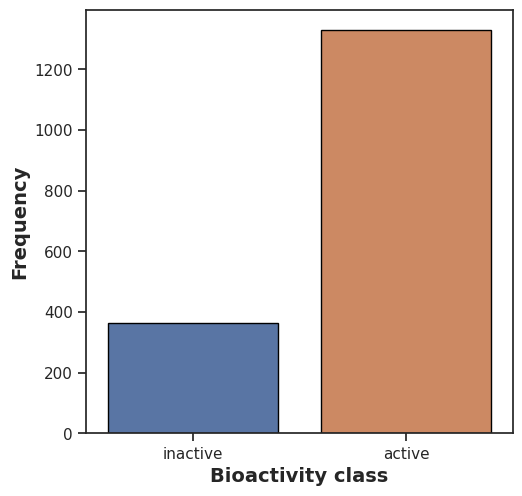

In [58]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

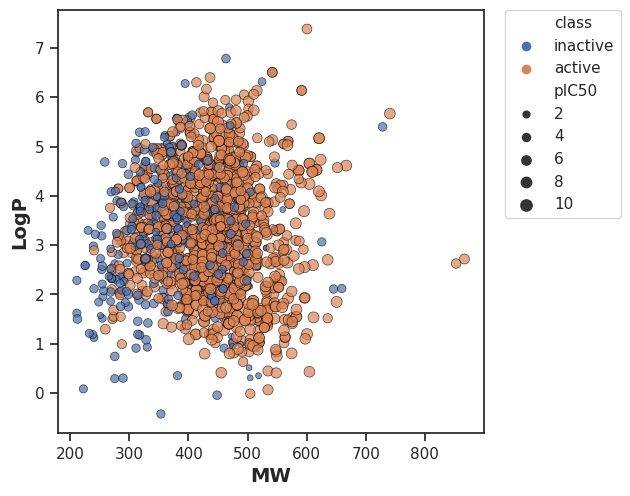

In [59]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

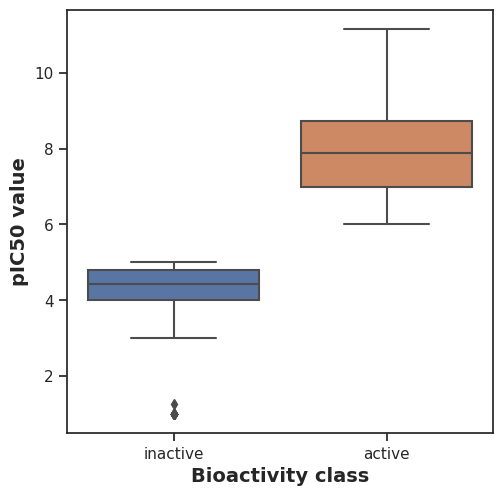

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [61]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [62]:
mannwhitney('pIC50')

Descriptor  Statistics              p  alpha  \
0      pIC50    482790.0  5.790825e-188   0.05   

                       Interpretation  
0  Different distribution (reject H0)

#### **MW**

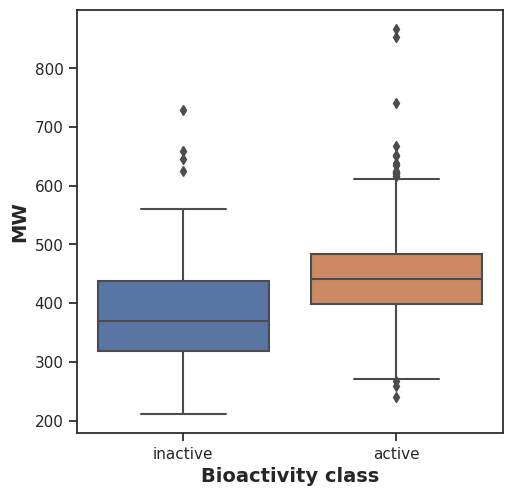

In [63]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [64]:
mannwhitney('MW')

Descriptor  Statistics             p  alpha  \
0         MW    352508.0  2.719889e-41   0.05   

                       Interpretation  
0  Different distribution (reject H0)

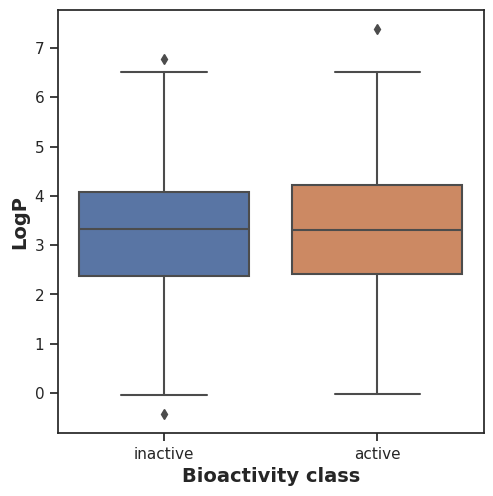

In [65]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [66]:
mannwhitney('LogP')

Descriptor  Statistics         p  alpha  \
0       LogP    243552.5  0.793877   0.05   

                          Interpretation  
0  Same distribution (fail to reject H0)

#### **NumHDonors**

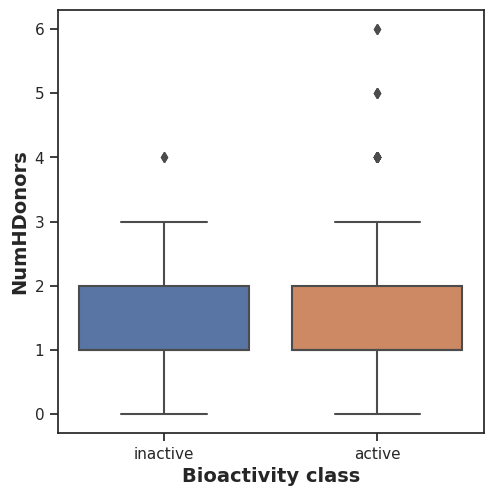

In [67]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [68]:
mannwhitney('NumHDonors')

Descriptor  Statistics         p  alpha                      Interpretation
0  NumHDonors    263891.5  0.003005   0.05  Different distribution (reject H0)

#### **NumHAcceptors**

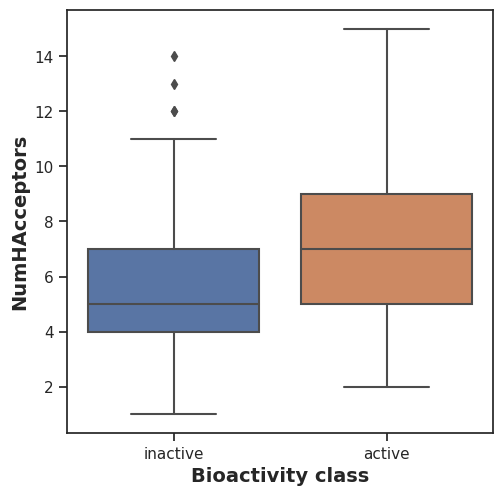

In [69]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [70]:
mannwhitney('NumHAcceptors')

Descriptor  Statistics             p  alpha  \
0  NumHAcceptors    332860.5  5.926171e-29   0.05   

                       Interpretation  
0  Different distribution (reject H0)

#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

# **[Part 3] Descriptor Calculation and Dataset Preparation**

In **Part 3**, we will be calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset. Finally, we will be preparing this into a dataset for subsequent model building in Part 4.

---

## **Download PaDEL-Descriptor**

In [71]:
! pip install padelpy

     |████████████████████████████████| 20.9 MB 36.4 MB/s 


In [72]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-09-04 14:11:13--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-09-04 14:11:13--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  48.9MB/s    in 0.5s    

2023-09-04 14:12:43 (48.9 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-09-04 14:12:43--  https://git

In [73]:
! 7z x padel.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 25768637 bytes (25 MiB)

Extracting archive: padel.zip
--
Path = padel.zip
Type = zip
Physical Size = 25768637

  0%     62% 146 - PaDEL-Descriptor/lib/cdk-1.4.15.jar                                              Everything is Ok

Folders: 3
Files: 165
Size:       29037784
Compressed: 25768637


## **Load bioactivity data**

Download the curated ChEMBL bioactivity data that has been pre-processed from Parts 1 and 2 of this Bioinformatics Project series. Here we will be using the **bioactivity_data_3class_pIC50.csv** file that essentially contain the pIC50 values that we will be using for building a regression model.

In [76]:
df3 = pd.read_csv('/content/phosphodiesterase_04_bioactivity_data_3class_pIC50.csv')

In [77]:
df3

Unnamed: 0 molecule_chembl_id  \
0              0       CHEMBL316185   
1              1        CHEMBL90164   
2              2        CHEMBL87901   
3              3       CHEMBL313197   
4              4        CHEMBL86578   
...          ...                ...   
2059        2059      CHEMBL5195434   
2060        2060      CHEMBL5171560   
2061        2061      CHEMBL5180169   
2062        2062      CHEMBL5219000   
2063        2063      CHEMBL5220907   

                                       canonical_smiles         class  \
0     CCOc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=O)[n...      inactive   
1     CCCOc1ccc(S(=O)(=O)N(CC)CCN(C)C)cc1-c1nc2c(=O)...        active   
2      CCCOc1ccccc1-c1nc2c(=O)n(C)c(=O)n(CC(C)C)c2[nH]1        active   
3     CCCOc1ccc(S(=O)(=O)N2CCN(CCN(C)C)CC2)cc1-c1nc2...        active   
4     CC(C)COc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=...        active   
...                                                 ...           ...   
2059  COc1cc2nc(Nc3cccc(S(N)(=O)=O)c3)nc(NC3CCN(C(C)...  intermediate   
2060  CCn1c(=O)c2c(c3ccc(C)nc31)O[C@@](C)(CCO)C[C@H]...  intermediate   
2061  CC1=C(C(=O)O[C@H](C)c2ccccc2)C(c2ccc3c(cnn3C)c...  intermediate   
2062  O=C(CCCCCCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2...        active   
2063  O=C(O)CCN1CC(=O)N2[C@H](CC3c4ccccc4NC3[C@H]2c2...        active   

           MW     LogP  NumHDonors  NumHAcceptors     pIC50  
0     448.505 -0.04830         2.0            8.0  5.000000  
1     534.683  2.10730         1.0            9.0  7.958607  
2     356.426  2.53510         1.0            6.0  7.221849  
3     575.736  1.40300         1.0           10.0  7.619789  
4     532.667  1.71720         1.0            9.0  7.031517  
...       ...      ...         ...            ...       ...  
2059  500.625  3.32270         3.0            9.0  5.467246  
2060  356.466  3.69822         1.0            5.0  5.371611  
2061  535.644  6.41690         1.0            7.0  5.742321  
2062  555.473  3.96710         3.0            5.0  7.335358  
2063  484.350  2.98590         2.0            4.0  8.698970  

[2064 rows x 9 columns]

In [78]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [79]:
! cat molecule.smi | head -5

CCOc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=O)[nH]c(=O)n(C)c2[nH]1	CHEMBL316185
CCCOc1ccc(S(=O)(=O)N(CC)CCN(C)C)cc1-c1nc2c(=O)n(C)c(=O)n(CC(C)C)c2[nH]1	CHEMBL90164
CCCOc1ccccc1-c1nc2c(=O)n(C)c(=O)n(CC(C)C)c2[nH]1	CHEMBL87901
CCCOc1ccc(S(=O)(=O)N2CCN(CCN(C)C)CC2)cc1-c1nc2c(=O)n(C)c(=O)n(CC(C)C)c2[nH]1	CHEMBL313197
CC(C)COc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(=O)n(C)c(=O)n(CC(C)C)c2[nH]1	CHEMBL86578


In [80]:
! cat molecule.smi | wc -l

2064


## **Calculate fingerprint descriptors**


### **Calculate PaDEL descriptors**

In [81]:
! type padel.sh

/bin/bash: line 1: type: padel.sh: not found


In [82]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [83]:
! "C:\Program Files\DBeaver\jre\bin\java.exe" -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./paDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./paDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv

/bin/bash: line 1: C:\Program Files\DBeaver\jre\bin\java.exe: command not found


In [84]:
! bash padel.sh

Processing CHEMBL316185 in molecule.smi (1/2064). 
Processing CHEMBL90164 in molecule.smi (2/2064). 
Processing CHEMBL87901 in molecule.smi (3/2064). Average speed: 12.35 s/mol.
Processing CHEMBL313197 in molecule.smi (4/2064). Average speed: 6.27 s/mol.
Processing CHEMBL86578 in molecule.smi (5/2064). Average speed: 4.65 s/mol.
Processing CHEMBL313561 in molecule.smi (6/2064). Average speed: 3.64 s/mol.
Processing CHEMBL89381 in molecule.smi (7/2064). Average speed: 3.41 s/mol.
Processing CHEMBL87202 in molecule.smi (8/2064). Average speed: 2.95 s/mol.
Processing CHEMBL87954 in molecule.smi (9/2064). Average speed: 2.98 s/mol.
Processing CHEMBL327772 in molecule.smi (10/2064). Average speed: 2.64 s/mol.
Processing CHEMBL433418 in molecule.smi (11/2064). Average speed: 2.58 s/mol.
Processing CHEMBL86743 in molecule.smi (12/2064). Average speed: 2.42 s/mol.
Processing CHEMBL314981 in molecule.smi (13/2064). Average speed: 2.26 s/mol.
Processing CHEMBL87304 in molecule.smi (14/2064). Ave

## **Preparing the X and Y Data Matrices**

### **X data matrix**

In [85]:
df3_X = pd.read_csv('descriptors_output.csv')

In [86]:
df3_X

Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0      CHEMBL316185           1           1           1           0   
1       CHEMBL90164           1           1           1           1   
2       CHEMBL87901           1           1           1           0   
3      CHEMBL313197           1           1           1           1   
4       CHEMBL86578           1           1           1           1   
...             ...         ...         ...         ...         ...   
2059  CHEMBL5178863           1           1           1           0   
2060  CHEMBL5171560           1           1           1           0   
2061  CHEMBL5180169           1           1           1           1   
2062  CHEMBL5219000           1           1           1           0   
2063  CHEMBL5220907           1           1           1           0   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  \
0              0           0           0           0           0  ...   
1              0           0           0           0           0  ...   
2              0           0           0           0           0  ...   
3              0           0           0           0           0  ...   
4              0           0           0           0           0  ...   
...          ...         ...         ...         ...         ...  ...   
2059           0           0           0           0           0  ...   
2060           0           0           0           0           0  ...   
2061           0           0           0           0           0  ...   
2062           0           0           0           0           0  ...   
2063           0           0           0           0           0  ...   

      PubchemFP871  PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2059             0             0             0             0             0   
2060             0             0             0             0             0   
2061             0             0             0             0             0   
2062             0             0             0             0             0   
2063             0             0             0             0             0   

      PubchemFP876  PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880  
0                0             0             0             0             0  
1                0             0             0             0             0  
2                0             0             0             0             0  
3                0             0             0             0             0  
4                0             0             0             0             0  
...            ...           ...           ...           ...           ...  
2059             0             0             0             0             0  
2060             0             0             0             0             0  
2061             0             0             0             0             0  
2062             0             0             0             0             0  
2063             0             0             0             0             0  

[2064 rows x 882 columns]

In [87]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           1           0           0           0   
1              1           1           1           1           0           0   
2              1           1           1           0           0           0   
3              1           1           1           1           0           0   
4              1           1           1           1           0           0   
...          ...         ...         ...         ...         ...         ...   
2059           1           1           1           0           0           0   
2060           1           1           1           0           0           0   
2061           1           1           1           1           0           0   
2062           1           1           1           0           0           0   
2063           1           1           1           0           0           0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP871  \
0              0           0           0           1  ...             0   
1              0           0           0           1  ...             0   
2              0           0           0           1  ...             0   
3              0           0           0           1  ...             0   
4              0           0           0           1  ...             0   
...          ...         ...         ...         ...  ...           ...   
2059           0           0           0           1  ...             0   
2060           0           0           0           1  ...             0   
2061           0           0           0           1  ...             0   
2062           0           0           0           1  ...             0   
2063           0           0           0           1  ...             0   

      PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2059             0             0             0             0             0   
2060             0             0             0             0             0   
2061             0             0             0             0             0   
2062             0             0             0             0             0   
2063             0             0             0             0             0   

      PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880  
0                0             0             0             0  
1                0             0             0             0  
2                0             0             0             0  
3                0             0             0             0  
4                0             0             0             0  
...            ...           ...           ...           ...  
2059             0             0             0             0  
2060             0             0             0             0  
2061             0             0             0             0  
2062             0             0             0             0  
2063             0             0             0             0  

[2064 rows x 881 columns]

## **Y variable**

### **Convert IC50 to pIC50**

In [88]:
df3_Y = df3['pIC50']
df3_Y

0       5.000000
1       7.958607
2       7.221849
3       7.619789
4       7.031517
          ...   
2059    5.467246
2060    5.371611
2061    5.742321
2062    7.335358
2063    8.698970
Name: pIC50, Length: 2064, dtype: float64

## **Combining X and Y variable**

In [89]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           1           0           0           0   
1              1           1           1           1           0           0   
2              1           1           1           0           0           0   
3              1           1           1           1           0           0   
4              1           1           1           1           0           0   
...          ...         ...         ...         ...         ...         ...   
2059           1           1           1           0           0           0   
2060           1           1           1           0           0           0   
2061           1           1           1           1           0           0   
2062           1           1           1           0           0           0   
2063           1           1           1           0           0           0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP872  \
0              0           0           0           1  ...             0   
1              0           0           0           1  ...             0   
2              0           0           0           1  ...             0   
3              0           0           0           1  ...             0   
4              0           0           0           1  ...             0   
...          ...         ...         ...         ...  ...           ...   
2059           0           0           0           1  ...             0   
2060           0           0           0           1  ...             0   
2061           0           0           0           1  ...             0   
2062           0           0           0           1  ...             0   
2063           0           0           0           1  ...             0   

      PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  PubchemFP877  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2059             0             0             0             0             0   
2060             0             0             0             0             0   
2061             0             0             0             0             0   
2062             0             0             0             0             0   
2063             0             0             0             0             0   

      PubchemFP878  PubchemFP879  PubchemFP880     pIC50  
0                0             0             0  5.000000  
1                0             0             0  7.958607  
2                0             0             0  7.221849  
3                0             0             0  7.619789  
4                0             0             0  7.031517  
...            ...           ...           ...       ...  
2059             0             0             0  5.467246  
2060             0             0             0  5.371611  
2061             0             0             0  5.742321  
2062             0             0             0  7.335358  
2063             0             0             0  8.698970  

[2064 rows x 882 columns]

In [90]:
dataset3.to_csv('phosphodiesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

# **[Part 4] Regression Models with Random Forest**
In **Part 4**, we will be building a regression model of phosphodiesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [91]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [92]:
df = pd.read_csv('/content/phosphodiesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **3. Input features**
The ***Phosphodiesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [93]:
X = df.drop('pIC50', axis=1)
X

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           1           0           0           0   
1              1           1           1           1           0           0   
2              1           1           1           0           0           0   
3              1           1           1           1           0           0   
4              1           1           1           1           0           0   
...          ...         ...         ...         ...         ...         ...   
2059           1           1           1           0           0           0   
2060           1           1           1           0           0           0   
2061           1           1           1           1           0           0   
2062           1           1           1           0           0           0   
2063           1           1           1           0           0           0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP871  \
0              0           0           0           1  ...             0   
1              0           0           0           1  ...             0   
2              0           0           0           1  ...             0   
3              0           0           0           1  ...             0   
4              0           0           0           1  ...             0   
...          ...         ...         ...         ...  ...           ...   
2059           0           0           0           1  ...             0   
2060           0           0           0           1  ...             0   
2061           0           0           0           1  ...             0   
2062           0           0           0           1  ...             0   
2063           0           0           0           1  ...             0   

      PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2059             0             0             0             0             0   
2060             0             0             0             0             0   
2061             0             0             0             0             0   
2062             0             0             0             0             0   
2063             0             0             0             0             0   

      PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880  
0                0             0             0             0  
1                0             0             0             0  
2                0             0             0             0  
3                0             0             0             0  
4                0             0             0             0  
...            ...           ...           ...           ...  
2059             0             0             0             0  
2060             0             0             0             0  
2061             0             0             0             0  
2062             0             0             0             0  
2063             0             0             0             0  

[2064 rows x 881 columns]

### **3.2. Output features**

In [94]:
Y = df.pIC50
Y

0       5.000000
1       7.958607
2       7.221849
3       7.619789
4       7.031517
          ...   
2059    5.467246
2060    5.371611
2061    5.742321
2062    7.335358
2063    8.698970
Name: pIC50, Length: 2064, dtype: float64

### **3.3. Let's examine the data dimension**

In [95]:
X.shape

(2064, 881)

In [96]:
Y.shape

(2064,)

### **3.4. Remove low variance features**

In [97]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [98]:
X.shape

(2064, 157)

## **4. Data split (80/20 ratio)**

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [100]:
X_train.shape, Y_train.shape

((1651, 157), (1651,))

In [101]:
X_test.shape, Y_test.shape

((413, 157), (413,))

## **5. Building a Regression Model using Random Forest**

In [102]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.673191973710868

In [103]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

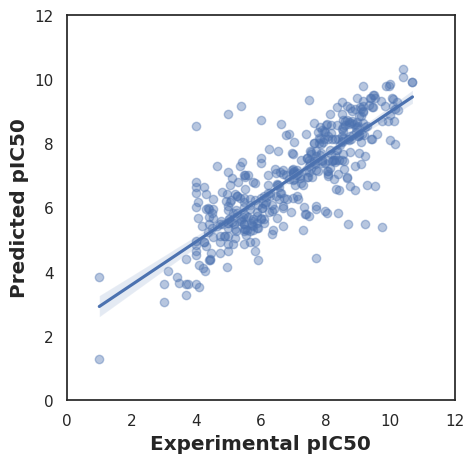

In [104]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# **[Part 5] Comparing Regressors**
In Part 5, we will be comparing several ML algorithms for build regression models of phosphodiesterase inhibitors.

In [ ]:
! pip install lazypredict

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [ ]:
df = pd.read_csv('/content/phosphodiesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [ ]:
# Examine X dimension
X.shape

(2064, 881)

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(2064, 157)

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [01:32<00:00,  2.21s/it]


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 471
[LightGBM] [Info] Number of data points in the train set: 1651, number of used features: 157
[LightGBM] [Info] Start training from score 6.796380
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [01:25<00:00,  2.03s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 471
[LightGBM] [Info] Number of data points in the train set: 1651, number of used features: 157
[LightGBM] [Info] Start training from score 6.796380


In [ ]:


# Performance table of the training set (80% subset)
predictions_train

Adjusted R-Squared  \
Model                                                         
DecisionTreeRegressor                                  0.94   
ExtraTreeRegressor                                     0.94   
ExtraTreesRegressor                                    0.94   
GaussianProcessRegressor                               0.94   
XGBRegressor                                           0.93   
RandomForestRegressor                                  0.90   
MLPRegressor                                           0.89   
BaggingRegressor                                       0.88   
HistGradientBoostingRegressor                          0.84   
LGBMRegressor                                          0.82   
KNeighborsRegressor                                    0.74   
GradientBoostingRegressor                              0.65   
SVR                                                    0.64   
NuSVR                                                  0.63   
TransformedTargetRegressor                             0.49   
LinearRegression                                       0.49   
Ridge                                                  0.49   
RidgeCV                                                0.48   
LassoCV                                                0.47   
ElasticNetCV                                           0.47   
BayesianRidge                                          0.46   
SGDRegressor                                           0.46   
HuberRegressor                                         0.44   
LinearSVR                                              0.42   
PoissonRegressor                                       0.42   
AdaBoostRegressor                                      0.33   
GammaRegressor                                         0.32   
LassoLarsIC                                            0.32   
TweedieRegressor                                       0.32   
OrthogonalMatchingPursuit                              0.32   
OrthogonalMatchingPursuitCV                            0.32   
LassoLarsCV                                            0.32   
LarsCV                                                 0.25   
ElasticNet                                            -0.07   
LassoLars                                             -0.11   
Lasso                                                 -0.11   
DummyRegressor                                        -0.11   
QuantileRegressor                                     -0.11   
PassiveAggressiveRegressor                            -0.33   
KernelRidge                                          -14.84   
Lars                                    -426888380934276.81   
RANSACRegressor               -1356706814738969114181632.00   

                                                  R-Squared             RMSE  \
Model                                                                          
DecisionTreeRegressor                                  0.94             0.43   
ExtraTreeRegressor                                     0.94             0.43   
ExtraTreesRegressor                                    0.94             0.43   
GaussianProcessRegressor                               0.94             0.43   
XGBRegressor                                           0.94             0.46   
RandomForestRegressor                                  0.91             0.54   
MLPRegressor                                           0.90             0.58   
BaggingRegressor                                       0.90             0.59   
HistGradientBoostingRegressor                          0.86             0.69   
LGBMRegressor                                          0.83             0.75   
KNeighborsRegressor                                    0.77             0.88   
GradientBoostingRegressor                              0.68             1.02   
SVR                                                    0.67             1.04   
NuSVR                                                  0.67         

In [ ]:
# Performance table of the test set (20% subset)
predictions_test

Adjusted R-Squared  \
Model                                                                       
NuSVR                                                                0.39   
HistGradientBoostingRegressor                                        0.38   
SVR                                                                  0.37   
LGBMRegressor                                                        0.34   
KNeighborsRegressor                                                  0.34   
GradientBoostingRegressor                                            0.33   
RandomForestRegressor                                                0.33   
BaggingRegressor                                                     0.31   
HuberRegressor                                                       0.30   
MLPRegressor                                                         0.26   
LinearSVR                                                            0.26   
XGBRegressor                                                         0.26   
RidgeCV                                                              0.23   
Ridge                                                                0.22   
BayesianRidge                                                        0.21   
SGDRegressor                                                         0.21   
LassoCV                                                              0.20   
ElasticNetCV                                                         0.20   
PoissonRegressor                                                     0.17   
TweedieRegressor                                                     0.09   
GammaRegressor                                                       0.09   
OrthogonalMatchingPursuitCV                                          0.08   
OrthogonalMatchingPursuit                                            0.08   
LassoLarsCV                                                          0.04   
LassoLarsIC                                                          0.03   
LarsCV                                                              -0.03   
AdaBoostRegressor                                                   -0.08   
ExtraTreesRegressor                                                 -0.14   
ExtraTreeRegressor                                                  -0.15   
DecisionTreeRegressor                                               -0.17   
ElasticNet                                                          -0.56   
LassoLars                                                           -0.62   
Lasso                                                               -0.62   
DummyRegressor                                                      -0.62   
QuantileRegressor                                                   -0.62   
PassiveAggressiveRegressor                                          -1.19   
GaussianProcessRegressor                                           -12.40   
KernelRidge                                                        -24.46   
TransformedTargetRegressor                     -4317335286670009827328.00   
LinearRegression                               -4317335286670009827328.00   
RANSACRegressor                             -2501541131058273562132480.00   
Lars                          -142914090970341613180013694018757066752.00   

                                                               R-Squared  \
Model                                                                      
NuSVR                                                               0.62   
HistGradientBoostingRegressor                                       0.61   
SVR                                                                 0.61   
LGBMRegressor                                                       0.59   
KNeighborsRegressor                                                 0.59   
GradientBoostingRegressor                                           0.59   
RandomForestRegressor                                     

## **5. Data visualization of model performance**

[(0.0, 1.0)]

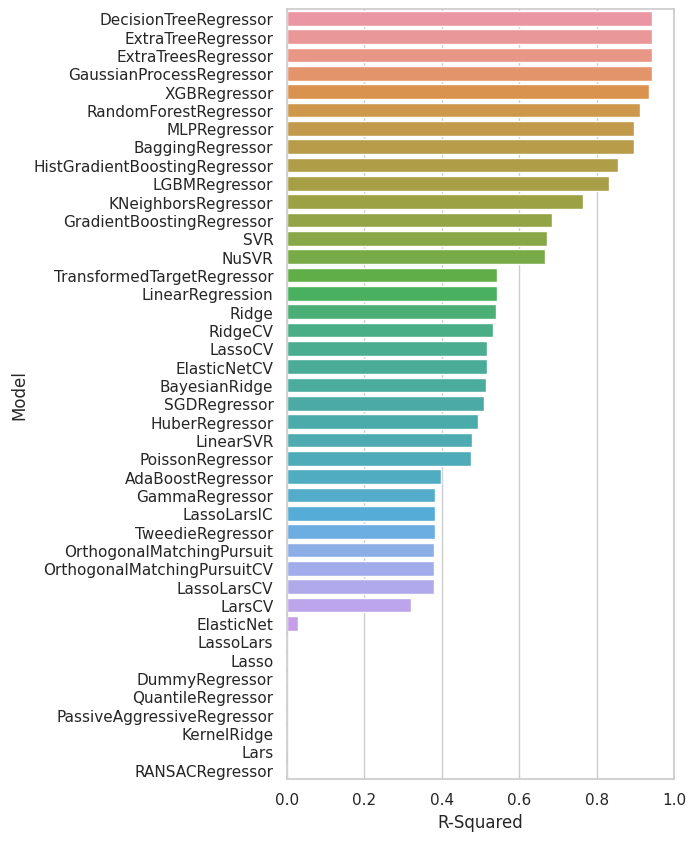

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

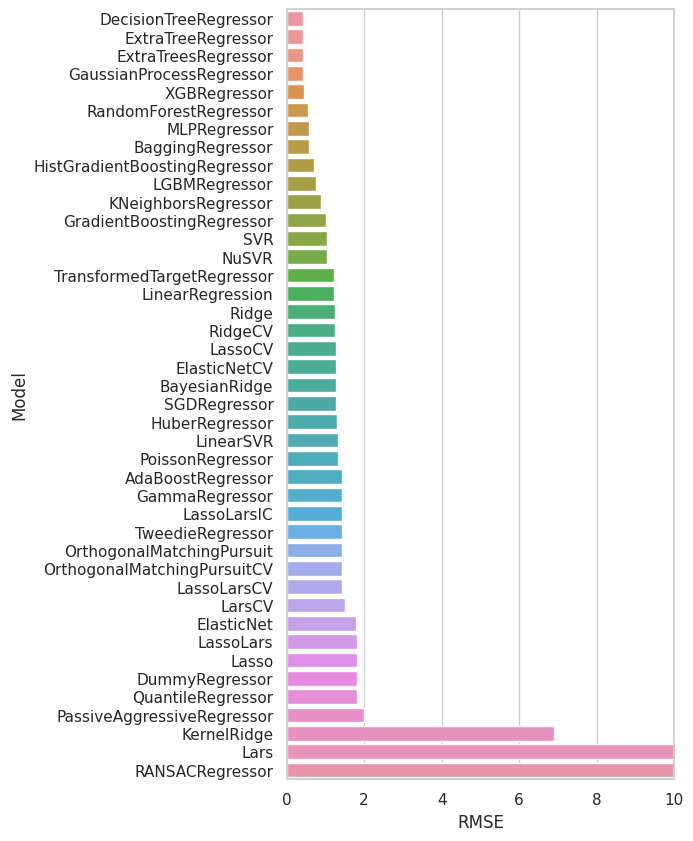

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

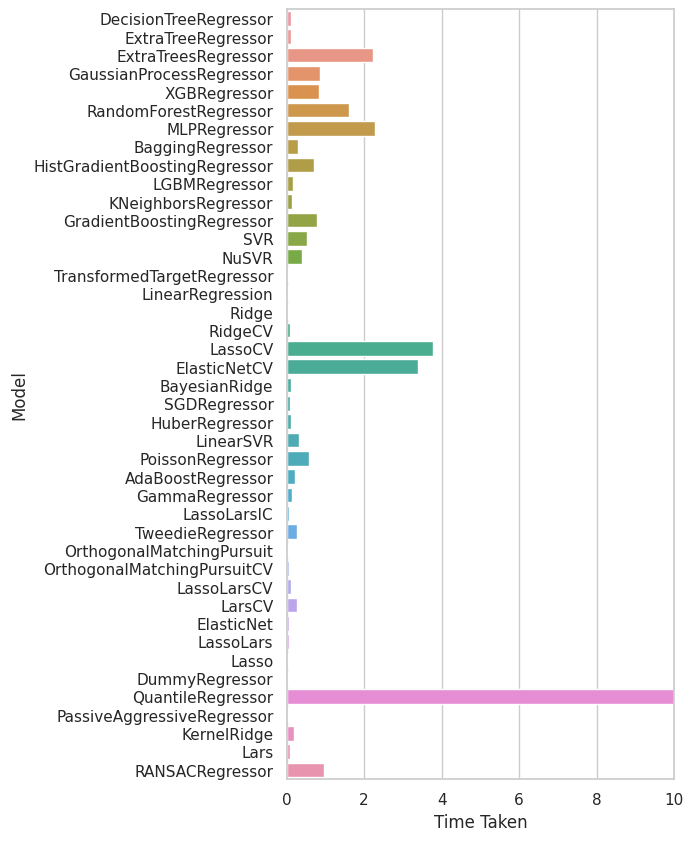

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))